# Music Genre Classification

### Problem Statement
- In this project, we are trying to classify music files into genres.

### Dataset
- Source : GTZAN dataset
- Original URL : http://marsyas.info/downloads/datasets.html
- Kaggle URL : https://www.kaggle.com/datasets/carlthome/gtzan-genre-collection
- 1000 files equally divided amongst 10 genre classes 
- Classes : 
  - Blues
  - Classical
  - Country
  - Disco
  - Hiphop
  - Jazz
  - Metal
  - Pop
  - Reggae
  - Rock

### Importing required packages

In [2]:
import os 
import torchaudio
import librosa
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew 
from scipy.stats import kurtosis
import pandas as pd

### Example Audio Files

In [3]:
blues_example_file_path = Path('raw_data/genres/blues/blues.00001.au')
disco_example_file_path = Path('raw_data/genres/disco/disco.00001.au')
rock_example_file_path = Path('raw_data/genres/rock/rock.00001.au')

In [4]:
y_blues, sr = librosa.load(blues_example_file_path)
y_disco, sr = librosa.load(disco_example_file_path)
y_rock, sr = librosa.load(rock_example_file_path)

In [7]:
labels = ['Blues', 'Disco', 'Rock']

In [156]:
print(f'Sampling Rate = {sr}')

Sampling Rate = 22050


In [163]:
print(f'Number of samples in blues file = {len(y_blues)}')
print(f'Number of samples in disco file = {len(y_disco)}')
print(f'Number of samples in rock file  = {len(y_rock)}')

Number of samples in blues file = 661794
Number of samples in disco file = 666160
Number of samples in rock file  = 661794


In [162]:
print(f'Duration of blues file = {len(y_blues)/sr :.2f} sec')
print(f'Duration of disco file = {len(y_disco)/sr :.2f} sec')
print(f'Duration of rock file  = {len(y_rock)/sr :.2f} sec')

Duration of blues file = 30.01 sec
Duration of disco file = 30.21 sec
Duration of rock file  = 30.01 sec


### Visualizing the waveform

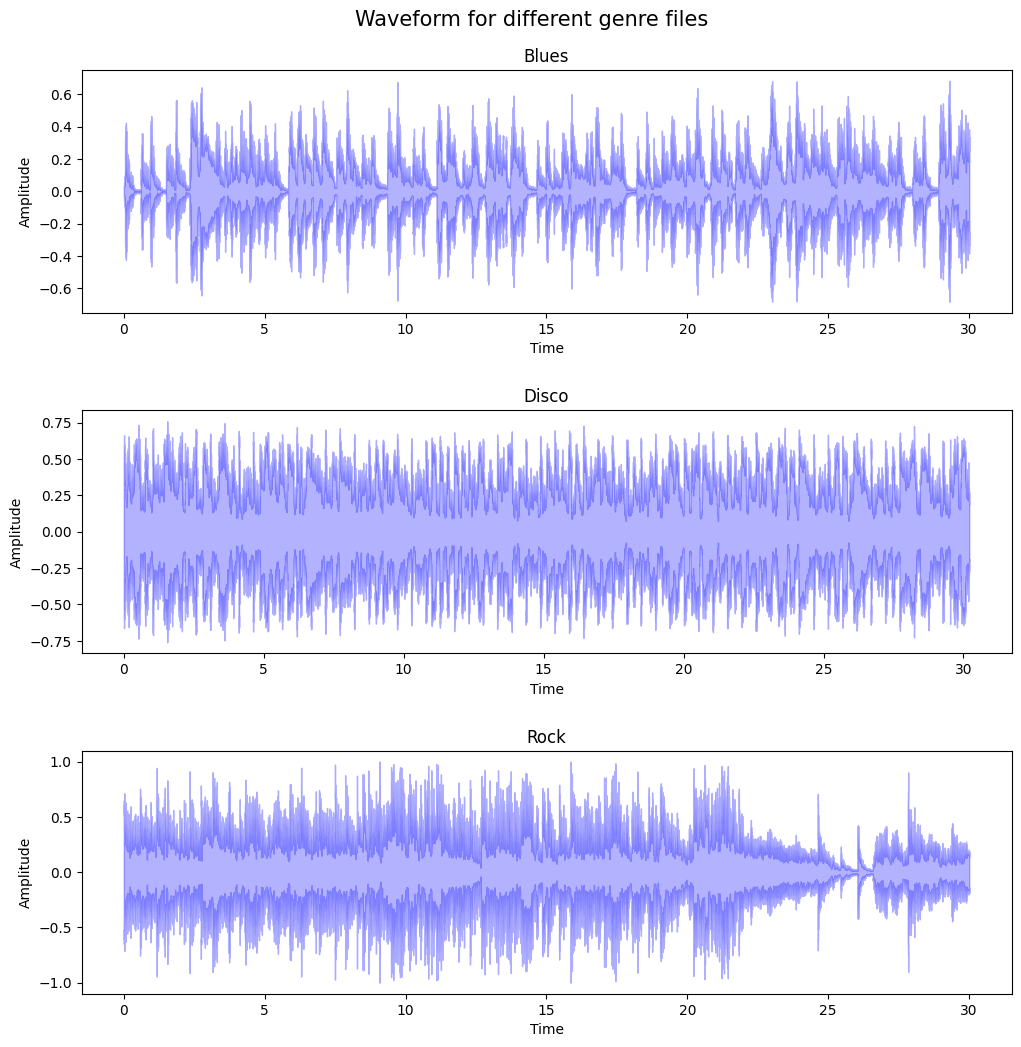

In [175]:
fig, axes = plt.subplots(3, 1, figsize = (12, 12))
librosa.display.waveshow(y_blues, sr=sr, color = 'blue', alpha = 0.3, ax = axes[0])
librosa.display.waveshow(y_disco, sr=sr, color = 'blue', alpha = 0.3, ax = axes[1])
librosa.display.waveshow(y_rock, sr=sr, color = 'blue', alpha = 0.3, ax = axes[2])
labels = ['Blues', 'Disco', 'Rock']
for i in range(3):
    axes[i].set_ylabel('Amplitude')
    axes[i].set_title(labels[i])
fig.suptitle('Waveform for different genre files', fontsize = 15, y = 0.93)
plt.subplots_adjust(wspace = 0.2, hspace= 0.4)
plt.show()

## Features

Specifying the frame length and hop length

In [176]:
frame_length = 1024
hop_length = 512

Getting Statistics

In [194]:
def get_statistics(x):
    return {
        'min' : [np.min(x)],
        'max' : [np.max(x)],
        'mean' : [np.mean(x)],
        'median' : [np.median(x)],
        'std' : [np.std(x)],
        'skewness' : [skew(x)],
        'kurtosis' : [kurtosis(x)]
    }

### Amplitude Envelope

- Ampltiude envelope refers to the change in amplitude of a sound over time.
- It refers to a curve outlining the extremes of an oscillating signal

In [177]:
def get_amplitude_envelope(y, frame_length, hop_length):
    amplitude_envelope = []
    
    for i in range(0, len(y), hop_length):
        curr_max_amplitude = max(y[i:i+frame_length])
        amplitude_envelope.append(curr_max_amplitude)
    
    return np.array(amplitude_envelope)

In [183]:
amplitude_envelope_blues = get_amplitude_envelope(y_blues, frame_length, hop_length)
amplitude_envelope_disco = get_amplitude_envelope(y_disco, frame_length, hop_length)
amplitude_envelope_rock = get_amplitude_envelope(y_rock, frame_length, hop_length)

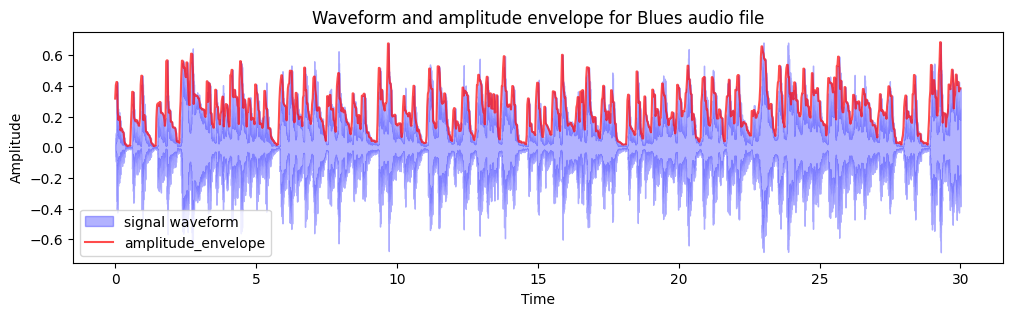

In [182]:
frames = range(0, amplitude_envelope_blues.size)
time = librosa.frames_to_time(frames, hop_length=hop_length)
plt.figure(figsize=(12, 3))
librosa.display.waveshow(y_blues, sr=sr, color = 'blue', alpha = 0.3, label = 'signal waveform')
plt.plot(time, amplitude_envelope_blues, color = 'red', alpha = 0.7, label = 'amplitude_envelope')
plt.title('Waveform and amplitude envelope for Blues audio file')
plt.legend()
plt.ylabel('Amplitude')
plt.show()

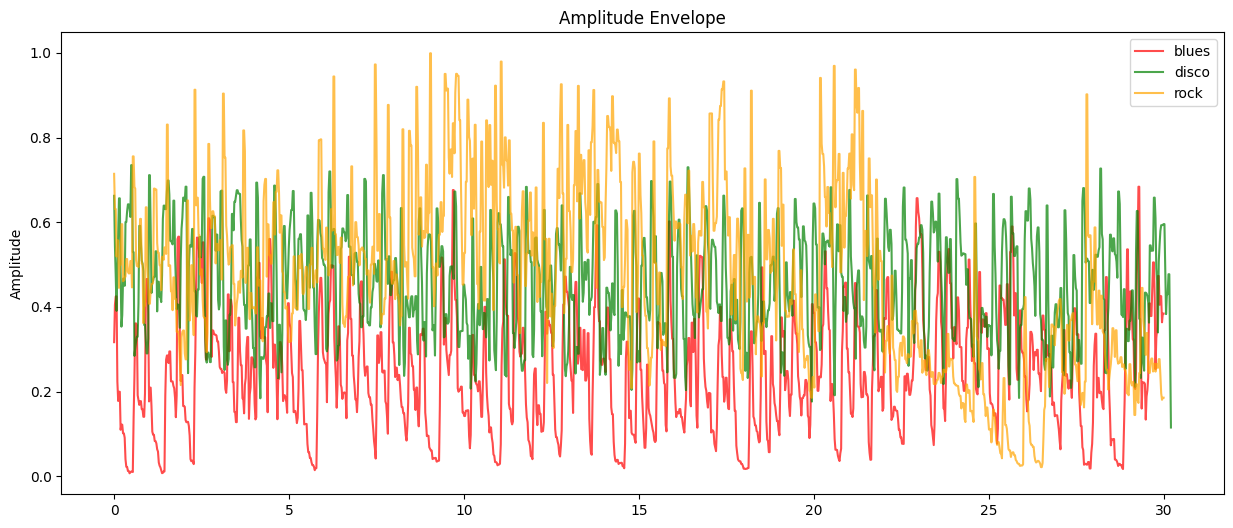

In [211]:
frames_blues = range(0, amplitude_envelope_blues.size)
time_blues = librosa.frames_to_time(frames_blues, hop_length=hop_length)
frames_disco = range(0, amplitude_envelope_disco.size)
time_disco = librosa.frames_to_time(frames_disco, hop_length=hop_length)
frames_rock = range(0, amplitude_envelope_rock.size)
time_rock = librosa.frames_to_time(frames_rock, hop_length=hop_length)
plt.figure(figsize=(15, 6))
plt.plot(time_blues, amplitude_envelope_blues, color = 'red', alpha = 0.7, label = 'blues')
plt.plot(time_disco, amplitude_envelope_disco, color = 'green', alpha = 0.7, label = 'disco')
plt.plot(time_rock, amplitude_envelope_rock, color = 'orange', alpha = 0.7, label = 'rock')
plt.legend()
plt.ylabel('Amplitude')
plt.title('Amplitude Envelope')
plt.show()

Statistics for Amplitude Envelope

In [198]:
df1 = pd.DataFrame(get_statistics(amplitude_envelope_blues), index = ['Blues'])
df2 = pd.DataFrame(get_statistics(amplitude_envelope_disco), index = ['Disco'])
df3 = pd.DataFrame(get_statistics(amplitude_envelope_rock), index = ['Rock'])
df = pd.concat([df1, df2, df3])
df

,min,max,mean,median,std,skewness,kurtosis
Blues,0.006958,0.683807,0.249066,0.235840,0.140119,0.398476,-0.348839
Disco,0.115051,0.734772,0.460391,0.460602,0.126774,0.025086,-0.905192
Rock,0.021484,0.998962,0.482413,0.482727,0.212576,0.134538,-0.472823


### Root Mean Square Energy

- It shows average loudness of the audio 

In [199]:
rmse_blues = librosa.feature.rms(y=y_blues, frame_length=frame_length, hop_length=hop_length)
rmse_disco = librosa.feature.rms(y=y_disco, frame_length=frame_length, hop_length=hop_length)
rmse_rock = librosa.feature.rms(y=y_rock, frame_length=frame_length, hop_length=hop_length)

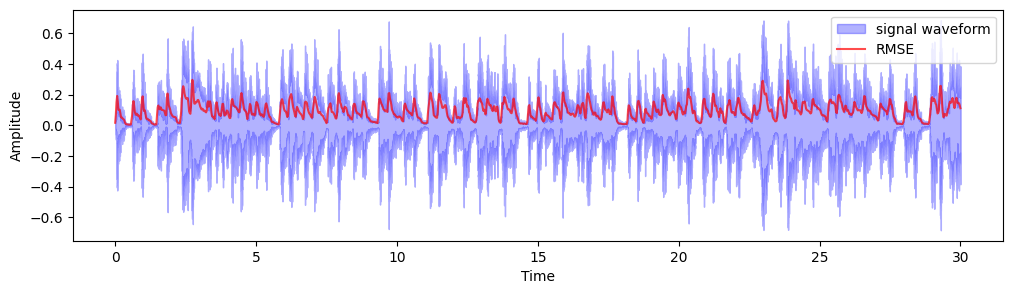

In [200]:
frames = range(0, rmse_blues.size)
time = librosa.frames_to_time(frames, hop_length=hop_length)
plt.figure(figsize=(12, 3))
librosa.display.waveshow(y_blues, sr=sr, color = 'blue', alpha = 0.3, label = 'signal waveform')
plt.plot(time, rmse_blues.squeeze(), color = 'red', alpha = 0.7, label = 'RMSE')
plt.legend()
plt.ylabel('Amplitude')
plt.show()

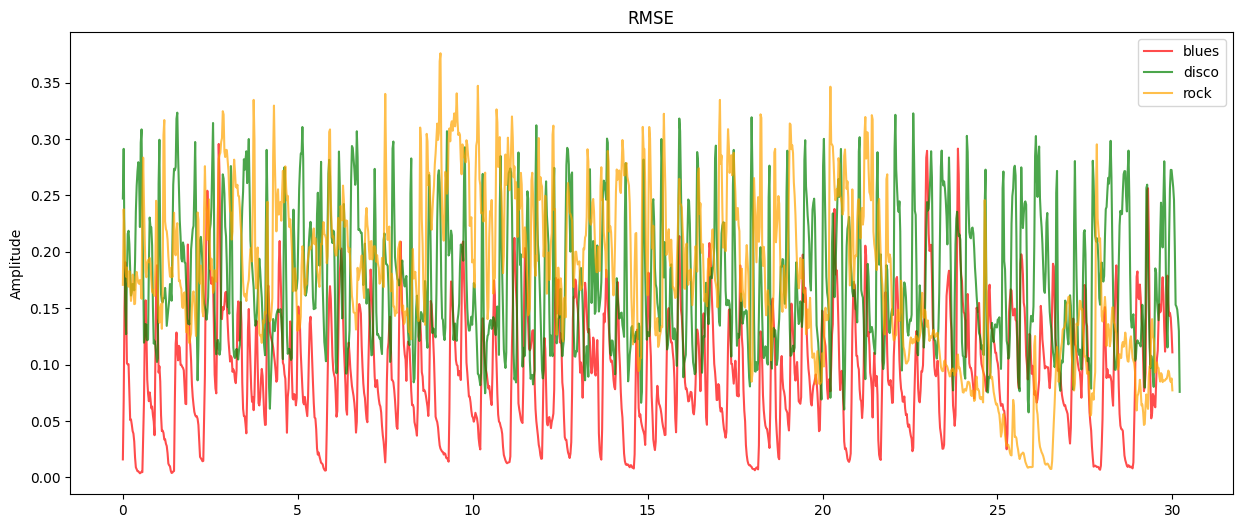

In [212]:
frames_blues = range(0, rmse_blues.size)
time_blues = librosa.frames_to_time(frames_blues, hop_length=hop_length)
frames_disco = range(0, rmse_disco.size)
time_disco = librosa.frames_to_time(frames_disco, hop_length=hop_length)
frames_rock = range(0, rmse_rock.size)
time_rock = librosa.frames_to_time(frames_rock, hop_length=hop_length)
plt.figure(figsize=(15, 6))
plt.plot(time_blues, rmse_blues.squeeze(), color = 'red', alpha = 0.7, label = 'blues')
plt.plot(time_disco, rmse_disco.squeeze(), color = 'green', alpha = 0.7, label = 'disco')
plt.plot(time_rock, rmse_rock.squeeze(), color = 'orange', alpha = 0.7, label = 'rock')
plt.legend()
plt.ylabel('Amplitude')
plt.title('RMSE')
plt.show()

Statistics for RMSE

In [207]:
df1 = pd.DataFrame(get_statistics(rmse_blues.squeeze()), index = ['Blues'])
df2 = pd.DataFrame(get_statistics(rmse_disco.squeeze()), index = ['Disco'])
df3 = pd.DataFrame(get_statistics(rmse_rock.squeeze()), index = ['Rock'])
df = pd.concat([df1, df2, df3])
df

,min,max,mean,median,std,skewness,kurtosis
Blues,0.003667,0.295631,0.093903,0.089681,0.052497,0.482578,0.108299
Disco,0.057656,0.323365,0.174415,0.162739,0.059781,0.445649,-0.816511
Rock,0.007496,0.376019,0.179304,0.180539,0.072915,-0.126726,-0.451700


### Zero Crossing Rate

- It provides information about the number of times the signal crosses the horizontal axis.

In [208]:
zcr_blues = librosa.feature.zero_crossing_rate(y=y_blues, frame_length=frame_length, hop_length=hop_length)
zcr_disco = librosa.feature.zero_crossing_rate(y=y_disco, frame_length=frame_length, hop_length=hop_length)
zcr_rock = librosa.feature.zero_crossing_rate(y=y_rock, frame_length=frame_length, hop_length=hop_length)
# This gives (zero crossings in a frame) / (frame length) 
zcr_blues

array([[0.01464844, 0.03125   , 0.02148438, ..., 0.07128906, 0.06738281,
        0.046875  ]])

In [210]:
# Actual Zero Crossing Rate
actual_zcr_blues = zcr_blues * frame_length 
actual_zcr_disco = zcr_disco * frame_length 
actual_zcr_rock = zcr_rock * frame_length 
actual_zcr_blues 

array([[15., 32., 22., ..., 73., 69., 48.]])

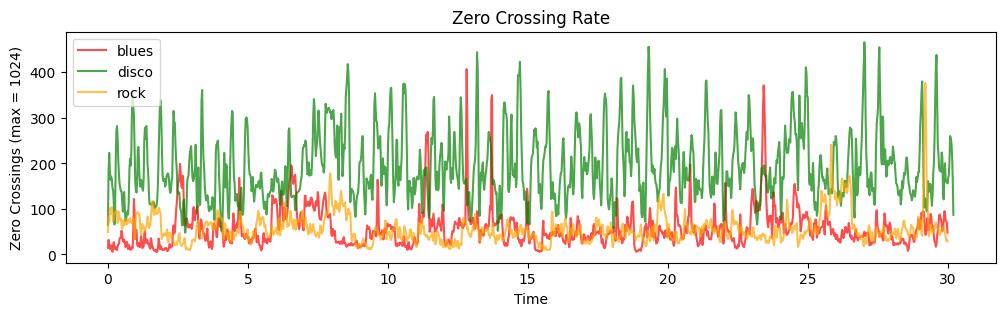

In [215]:
frames_blues = range(0, actual_zcr_blues.size)
time_blues = librosa.frames_to_time(frames_blues, hop_length=hop_length)
frames_disco = range(0, actual_zcr_disco.size)
time_disco = librosa.frames_to_time(frames_disco, hop_length=hop_length)
frames_rock = range(0, actual_zcr_rock.size)
time_rock = librosa.frames_to_time(frames_rock, hop_length=hop_length)
plt.figure(figsize=(12, 3))
plt.plot(time_blues, actual_zcr_blues.squeeze(), color = 'red', alpha = 0.7, label = 'blues')
plt.plot(time_disco, actual_zcr_disco.squeeze(), color = 'green', alpha = 0.7, label = 'disco')
plt.plot(time_rock, actual_zcr_rock.squeeze(), color = 'orange', alpha = 0.7, label = 'rock')
plt.ylabel(f'Zero Crossings (max = {frame_length})')
plt.xlabel('Time')
plt.title('Zero Crossing Rate')
plt.legend()
plt.show()

Statistics for ZCR

In [217]:
df1 = pd.DataFrame(get_statistics(zcr_blues.squeeze()), index = ['Blues'])
df2 = pd.DataFrame(get_statistics(zcr_disco.squeeze()), index = ['Disco'])
df3 = pd.DataFrame(get_statistics(zcr_rock.squeeze()), index = ['Rock'])
df = pd.concat([df1, df2, df3])
df

,min,max,mean,median,std,skewness,kurtosis
Blues,0.004883,0.397461,0.056027,0.047852,0.041528,2.856910,13.992067
Disco,0.046875,0.455078,0.188517,0.171875,0.073179,0.839371,0.414810
Rock,0.009766,0.367188,0.054956,0.048828,0.030919,2.921856,18.179968


### Spectral Bandwidth

- It provides an indication of how spread out the frequencies are in the spectrum

In [250]:
spectral_bw_blues = librosa.feature.spectral_bandwidth(y=y_blues, sr=sr, n_fft=frame_length, hop_length = hop_length)
spectral_bw_disco = librosa.feature.spectral_bandwidth(y=y_disco, sr=sr, n_fft=frame_length, hop_length = hop_length)
spectral_bw_rock = librosa.feature.spectral_bandwidth(y=y_rock, sr=sr, n_fft=frame_length, hop_length = hop_length)

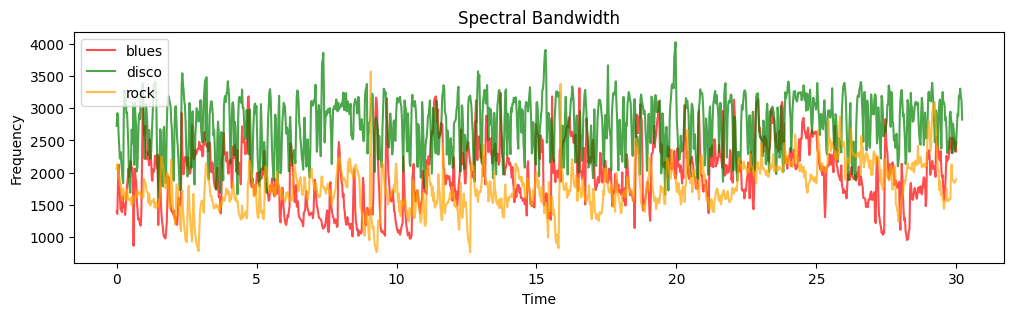

In [251]:
frames_blues = range(0, spectral_bw_blues.size)
time_blues = librosa.frames_to_time(frames_blues, hop_length=hop_length)
frames_disco = range(0, spectral_bw_disco.size)
time_disco = librosa.frames_to_time(frames_disco, hop_length=hop_length)
frames_rock = range(0, spectral_bw_rock.size)
time_rock = librosa.frames_to_time(frames_rock, hop_length=hop_length)
plt.figure(figsize=(12, 3))
plt.plot(time_blues, spectral_bw_blues.squeeze(), color = 'red', alpha = 0.7, label = 'blues')
plt.plot(time_disco, spectral_bw_disco.squeeze(), color = 'green', alpha = 0.7, label = 'disco')
plt.plot(time_rock, spectral_bw_rock.squeeze(), color = 'orange', alpha = 0.7, label = 'rock')
plt.ylabel(f'Frequency')
plt.xlabel('Time')
plt.title('Spectral Bandwidth')
plt.legend()
plt.show()

Statistics for Spectral Bandwidth

In [252]:
df1 = pd.DataFrame(get_statistics(spectral_bw_blues.squeeze()), index = ['Blues'])
df2 = pd.DataFrame(get_statistics(spectral_bw_disco.squeeze()), index = ['Disco'])
df3 = pd.DataFrame(get_statistics(spectral_bw_rock.squeeze()), index = ['Rock'])
df = pd.concat([df1, df2, df3])
df

,min,max,mean,median,std,skewness,kurtosis
Blues,866.567869,3311.542048,1972.260927,1982.041214,477.636631,0.080418,-0.415031
Disco,1619.382296,4021.794920,2742.831618,2817.772598,418.472760,-0.365949,-0.496096
Rock,768.519573,3568.917998,1784.241431,1748.597452,346.456676,0.286678,1.272704


### Spectral Rolloff

- Spectral rolloff is the frequency below which a specified percentage of the total spectral energy lies. (Default = 85%)

In [254]:
spectral_rolloff_blues = librosa.feature.spectral_rolloff(y=y_blues, sr=sr, n_fft=frame_length, hop_length=hop_length)
spectral_rolloff_disco = librosa.feature.spectral_rolloff(y=y_disco, sr=sr, n_fft=frame_length, hop_length=hop_length)
spectral_rolloff_rock = librosa.feature.spectral_rolloff(y=y_rock, sr=sr, n_fft=frame_length, hop_length=hop_length)

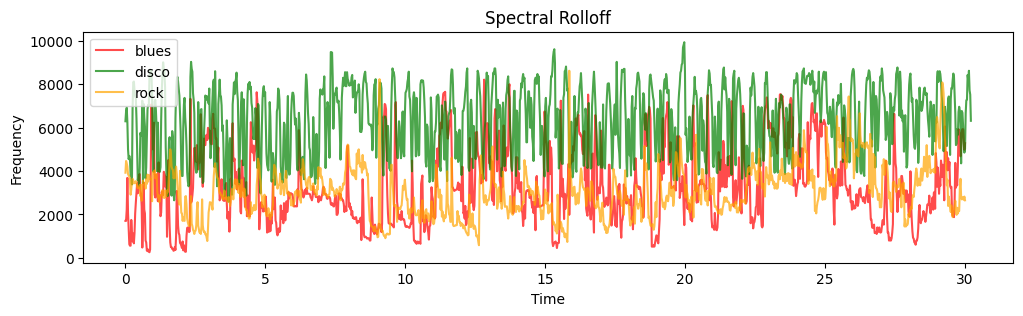

In [255]:
frames_blues = range(0, spectral_rolloff_blues.size)
time_blues = librosa.frames_to_time(frames_blues, hop_length=hop_length)
frames_disco = range(0, spectral_rolloff_disco.size)
time_disco = librosa.frames_to_time(frames_disco, hop_length=hop_length)
frames_rock = range(0, spectral_rolloff_rock.size)
time_rock = librosa.frames_to_time(frames_rock, hop_length=hop_length)
plt.figure(figsize=(12, 3))
plt.plot(time_blues, spectral_rolloff_blues.squeeze(), color = 'red', alpha = 0.7, label = 'blues')
plt.plot(time_disco, spectral_rolloff_disco.squeeze(), color = 'green', alpha = 0.7, label = 'disco')
plt.plot(time_rock, spectral_rolloff_rock.squeeze(), color = 'orange', alpha = 0.7, label = 'rock')
plt.ylabel(f'Frequency')
plt.xlabel('Time')
plt.title('Spectral Rolloff')
plt.legend()
plt.show()

Statistics for Spectral Rolloff

In [256]:
df1 = pd.DataFrame(get_statistics(spectral_rolloff_blues.squeeze()), index = ['Blues'])
df2 = pd.DataFrame(get_statistics(spectral_rolloff_disco.squeeze()), index = ['Disco'])
df3 = pd.DataFrame(get_statistics(spectral_rolloff_rock.squeeze()), index = ['Rock'])
df = pd.concat([df1, df2, df3])
df

,min,max,mean,median,std,skewness,kurtosis
Blues,258.398438,8204.150391,3290.699772,2971.582031,1727.745280,0.565464,-0.406535
Disco,2583.984375,9926.806641,6362.995369,6653.759766,1568.650485,-0.276706,-1.016705
Rock,581.396484,8613.281250,3050.986759,2950.048828,1134.075881,0.738095,1.476855


### Spectral Centroid

- It indicates at which frequency the energy of a spectrum is centered upon.

In [257]:
spectral_centroid_blues = librosa.feature.spectral_centroid(y=y_blues, sr=sr, n_fft=frame_length, hop_length = hop_length)
spectral_centroid_disco = librosa.feature.spectral_centroid(y=y_disco, sr=sr, n_fft=frame_length, hop_length = hop_length)
spectral_centroid_rock = librosa.feature.spectral_centroid(y=y_rock, sr=sr, n_fft=frame_length, hop_length = hop_length)

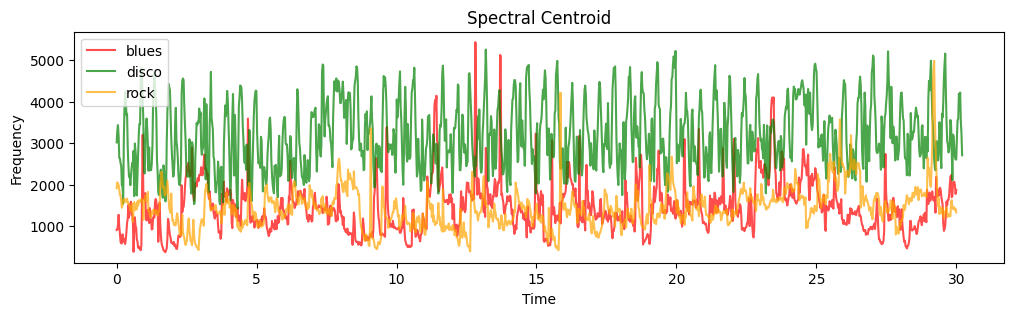

In [258]:
frames_blues = range(0, spectral_centroid_blues.size)
time_blues = librosa.frames_to_time(frames_blues, hop_length=hop_length)
frames_disco = range(0, spectral_centroid_disco.size)
time_disco = librosa.frames_to_time(frames_disco, hop_length=hop_length)
frames_rock = range(0, spectral_centroid_rock.size)
time_rock = librosa.frames_to_time(frames_rock, hop_length=hop_length)
plt.figure(figsize=(12, 3))
plt.plot(time_blues, spectral_centroid_blues.squeeze(), color = 'red', alpha = 0.7, label = 'blues')
plt.plot(time_disco, spectral_centroid_disco.squeeze(), color = 'green', alpha = 0.7, label = 'disco')
plt.plot(time_rock, spectral_centroid_rock.squeeze(), color = 'orange', alpha = 0.7, label = 'rock')
plt.ylabel(f'Frequency')
plt.xlabel('Time')
plt.title('Spectral Centroid')
plt.legend()
plt.show()

Statistics for Spectral Centroid

In [259]:
df1 = pd.DataFrame(get_statistics(spectral_centroid_blues.squeeze()), index = ['Blues'])
df2 = pd.DataFrame(get_statistics(spectral_centroid_disco.squeeze()), index = ['Disco'])
df3 = pd.DataFrame(get_statistics(spectral_centroid_rock.squeeze()), index = ['Rock'])
df = pd.concat([df1, df2, df3])
df

,min,max,mean,median,std,skewness,kurtosis
Blues,372.728958,5430.122466,1450.864079,1371.601270,615.056290,1.473587,4.763791
Disco,1425.949465,5253.643259,3189.492304,3079.339283,792.695926,0.297773,-0.696669
Rock,392.675167,4981.214225,1444.522962,1407.313480,471.810337,1.382401,6.800574


### Tempo

- It refers to the speed or pace at which a piece of music is played

In [281]:
tempo_blues = librosa.feature.rhythm.tempo(y=y_blues, sr=sr, hop_length=hop_length)
tempo_disco = librosa.feature.rhythm.tempo(y=y_disco, sr=sr, hop_length=hop_length)
tempo_rock = librosa.feature.rhythm.tempo(y=y_rock, sr=sr, hop_length=hop_length)

In [282]:
print(f'Tempo for Blues music file : {tempo_blues.item():.2f}')
print(f'Tempo for Disco music file : {tempo_disco.item():.2f}')
print(f'Tempo for Rock music file  : {tempo_rock.item():.2f}')

Tempo for Blues music file : 107.67
Tempo for Disco music file : 117.45
Tempo for Rock music file  : 152.00


### Spectrogram

- A spectrogram is a figure which represents the spectrum of frequencies of audio over time. 
- We can use it as feature for Deep Learning Models

In [ ]:
S_blues = np.abs(librosa.stft(y_blues, n_fft=frame_length,  hop_length=hop_length))
S_disco = np.abs(librosa.stft(y_disco, n_fft=frame_length,  hop_length=hop_length))
S_rock = np.abs(librosa.stft(y_rock, n_fft=frame_length,  hop_length=hop_length))

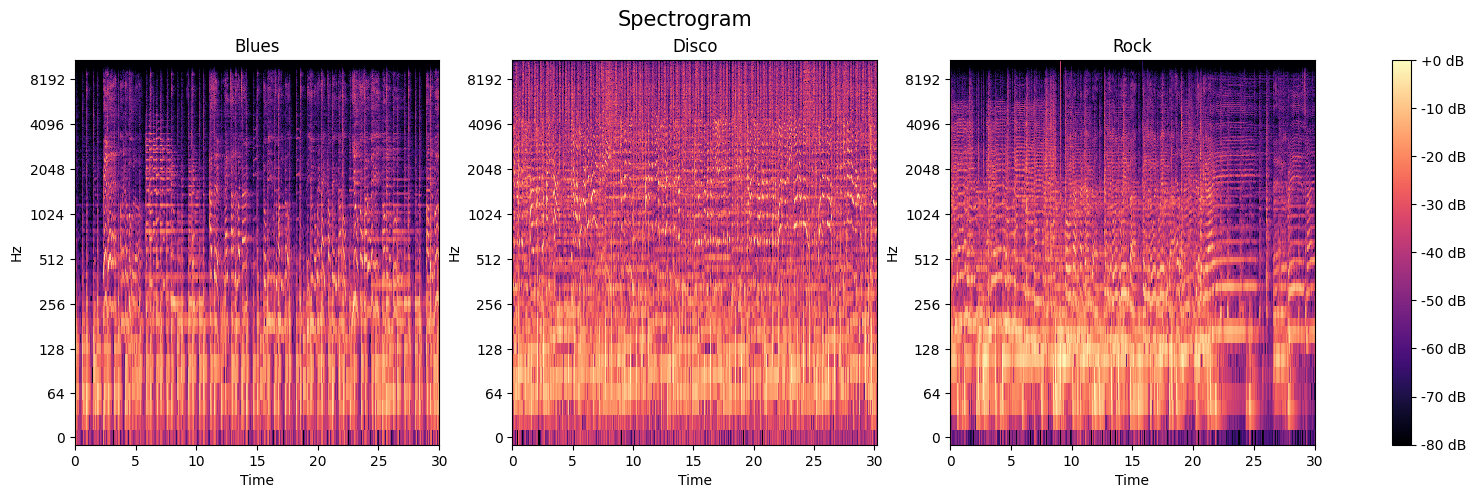

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
img_1 = librosa.display.specshow(librosa.amplitude_to_db(S_blues, ref = np.max),
                               hop_length=hop_length,
                               y_axis = 'log',
                               x_axis = 'time',
                               ax = ax[0])
img_2 = librosa.display.specshow(librosa.amplitude_to_db(S_disco, ref = np.max),
                               hop_length=hop_length,
                               y_axis = 'log',
                               x_axis = 'time',
                               ax = ax[1])
img_3 = librosa.display.specshow(librosa.amplitude_to_db(S_rock, ref = np.max),
                               hop_length=hop_length,
                               y_axis = 'log',
                               x_axis = 'time',
                               ax = ax[2])
for i in range(3):
    ax[i].set_title(labels[i])
fig.suptitle('Spectrogram', fontsize = 15, x = 0.43)
fig.colorbar(img_1, ax=ax, format="%+2.0f dB")

### Spectral Contrast

- Each frame of a spectrogram S is divided into sub-bands.
- For each sub-band, the energy contrast is estimated by comparing the mean energy in the top quantile (peak energy) to that of the bottom quantile (valley energy). High contrast values generally correspond to clear, narrow-band signals, while low contrast values correspond to broad-band noise.

In [269]:
spectral_contrast_blues = librosa.feature.spectral_contrast(y=y_blues, sr=sr, n_fft=frame_length, hop_length=hop_length)
spectral_contrast_disco = librosa.feature.spectral_contrast(y=y_disco, sr=sr, n_fft=frame_length, hop_length=hop_length)
spectral_contrast_rock = librosa.feature.spectral_contrast(y=y_rock, sr=sr, n_fft=frame_length, hop_length=hop_length)

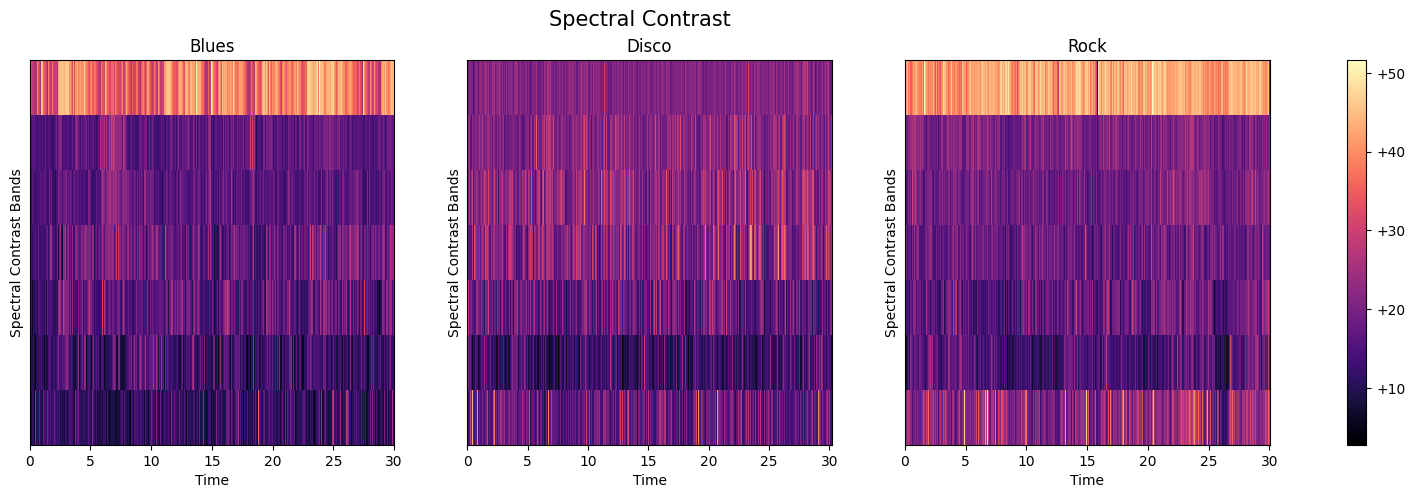

In [270]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
img_1 = librosa.display.specshow(spectral_contrast_blues,
                                 n_fft=frame_length,
                                 hop_length=hop_length,
                                 sr = sr, 
                                 x_axis = 'time',
                                 ax = ax[0])
img_2 = librosa.display.specshow(spectral_contrast_disco,
                                 n_fft=frame_length,
                                 hop_length=hop_length,
                                 sr = sr, 
                                 x_axis = 'time',
                                 ax = ax[1])
img_3 = librosa.display.specshow(spectral_contrast_rock,
                                 n_fft=frame_length,
                                 hop_length=hop_length,
                                 sr = sr, 
                                 x_axis = 'time',
                                 ax = ax[2]),
for i in range(3):
    ax[i].set_title(labels[i])
    ax[i].set_ylabel('Spectral Contrast Bands')
fig.suptitle('Spectral Contrast', fontsize = 15, x = 0.43)
fig.colorbar(img_1, ax=ax, format="%+2.0f")

### Chromagram

- It displays information about musical notes contained in a sound

In [284]:
chroma_blues = librosa.feature.chroma_stft(y=y_blues, sr=sr, n_fft=frame_length, hop_length=hop_length)
chroma_disco = librosa.feature.chroma_stft(y=y_disco, sr=sr, n_fft=frame_length, hop_length=hop_length)
chroma_rock = librosa.feature.chroma_stft(y=y_rock, sr=sr, n_fft=frame_length, hop_length=hop_length)

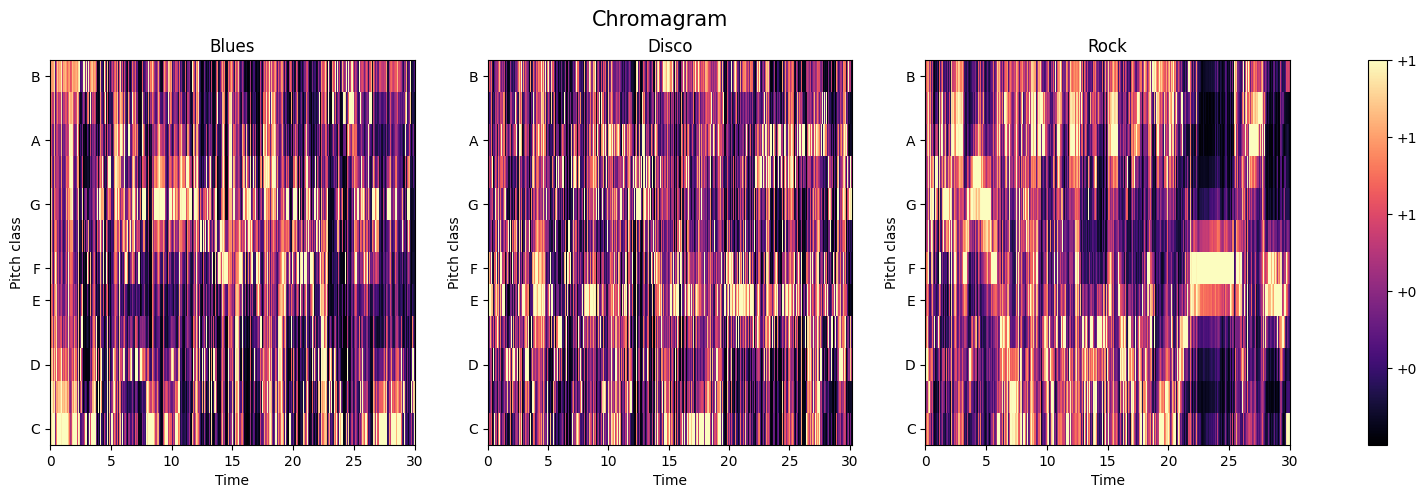

In [288]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
img_1 = librosa.display.specshow(chroma_blues,
                                 y_axis = 'chroma',
                                 x_axis = 'time',
                                 ax = ax[0])
img_2 = librosa.display.specshow(chroma_disco,
                                 y_axis = 'chroma',
                                 x_axis = 'time',
                                 ax = ax[1])
img_3 = librosa.display.specshow(chroma_rock,
                                 y_axis = 'chroma',
                                 x_axis = 'time',
                                 ax = ax[2])
for i in range(3):
    ax[i].set_title(labels[i])
    #ax[i].set_ylabel('Spectral Contrast Bands')
fig.suptitle('Chromagram', fontsize = 15, x = 0.43)
fig.colorbar(img_1, ax=ax, format="%+2.0f")
plt.show()

### Tonnetz

- It is representation of musical pitch relationship based on tonal harmony

In [5]:
tonnetz_blues = librosa.feature.tonnetz(y=librosa.effects.harmonic(y_blues), sr=sr)
tonnetz_disco = librosa.feature.tonnetz(y=librosa.effects.harmonic(y_disco), sr=sr)
tonnetz_rock = librosa.feature.tonnetz(y=librosa.effects.harmonic(y_rock), sr=sr)

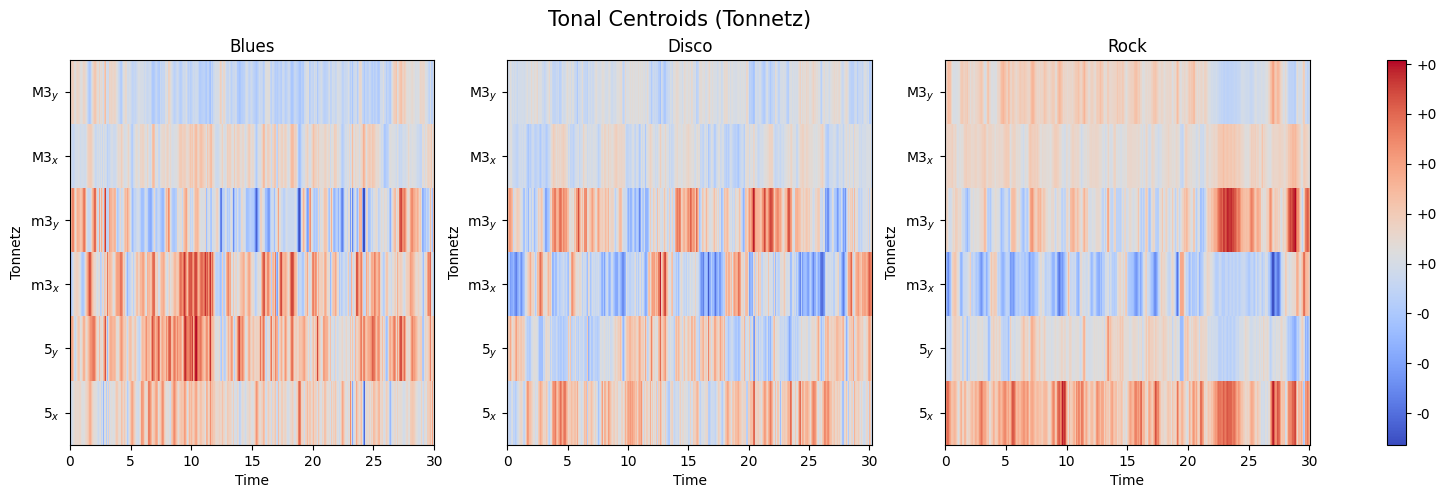

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
img_1 = librosa.display.specshow(tonnetz_blues,
                                 y_axis = 'tonnetz',
                                 x_axis = 'time',
                                 ax = ax[0])
img_2 = librosa.display.specshow(tonnetz_disco,
                                 y_axis = 'tonnetz',
                                 x_axis = 'time',
                                 ax = ax[1])
img_3 = librosa.display.specshow(tonnetz_rock,
                                 y_axis = 'tonnetz',
                                 x_axis = 'time',
                                 ax = ax[2])
for i in range(3):
    ax[i].set_title(labels[i])
    #ax[i].set_ylabel('Spectral Contrast Bands')
fig.suptitle('Tonal Centroids (Tonnetz)', fontsize = 15, x = 0.43)
fig.colorbar(img_1, ax=ax, format="%+2.0f")
plt.show()

### Mel Spectrogram

- Mel Spectrogram is a variation of spectrogram
- It is based on Mel scale which is based on human perception of pitch

In [231]:
S_blues = librosa.feature.melspectrogram(y=y_blues, sr=sr, n_fft=frame_length, hop_length=hop_length ,n_mels = 128)
S_disco = librosa.feature.melspectrogram(y=y_disco, sr=sr, n_fft=frame_length, hop_length=hop_length ,n_mels = 128)
S_rock = librosa.feature.melspectrogram(y=y_rock, sr=sr, n_fft=frame_length, hop_length=hop_length ,n_mels = 128)

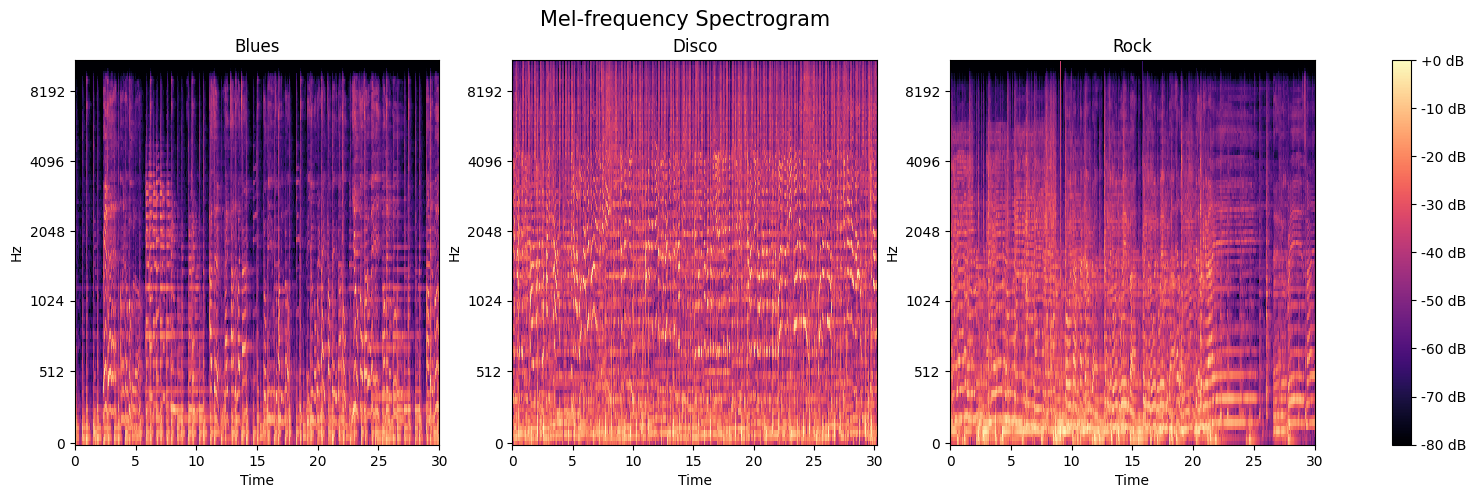

In [233]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
img_1 = librosa.display.specshow(librosa.power_to_db(S_blues, ref = np.max),
                               hop_length=hop_length,
                               y_axis = 'mel',
                               sr = sr,
                               x_axis = 'time',
                               ax = ax[0])
img_2 = librosa.display.specshow(librosa.power_to_db(S_disco, ref = np.max),
                               hop_length=hop_length,
                               y_axis = 'mel',
                               sr = sr,
                               x_axis = 'time',
                               ax = ax[1])
img_3 = librosa.display.specshow(librosa.power_to_db(S_rock, ref = np.max),
                               hop_length=hop_length,
                               y_axis = 'mel',
                               sr = sr,
                               x_axis = 'time',
                               ax = ax[2])
for i in range(3):
    ax[i].set_title(labels[i])
fig.suptitle('Mel-frequency Spectrogram', fontsize = 15, x = 0.43)
fig.colorbar(img_1, ax=ax, format="%+2.0f dB")

### MFCC

- MFCCs (Mel-Frequency Cepstral Coefficients) are a set of coefficients which capture the spectral characteristics of a audio signal
- We can think of them as dimensionality reduction of mel spectrogram

In [234]:
mfccs_blues = librosa.feature.mfcc(y=y_blues, n_mfcc=13, sr = sr, n_fft = frame_length, hop_length = hop_length)
mfccs_disco = librosa.feature.mfcc(y=y_disco, n_mfcc=13, sr = sr, n_fft = frame_length, hop_length = hop_length)
mfccs_rock = librosa.feature.mfcc(y=y_rock, n_mfcc=13, sr = sr, n_fft = frame_length, hop_length = hop_length)

In [240]:
print(f'Shape of Blues MFCC = {mfccs_blues.shape}')
print(f'Shape of Disco MFCC = {mfccs_disco.shape}')
print(f'Shape of Rock MFCC = {mfccs_blues.shape}')

Shape of Blues MFCC = (13, 1293)
Shape of Disco MFCC = (13, 1302)
Shape of Rock MFCC = (13, 1293)


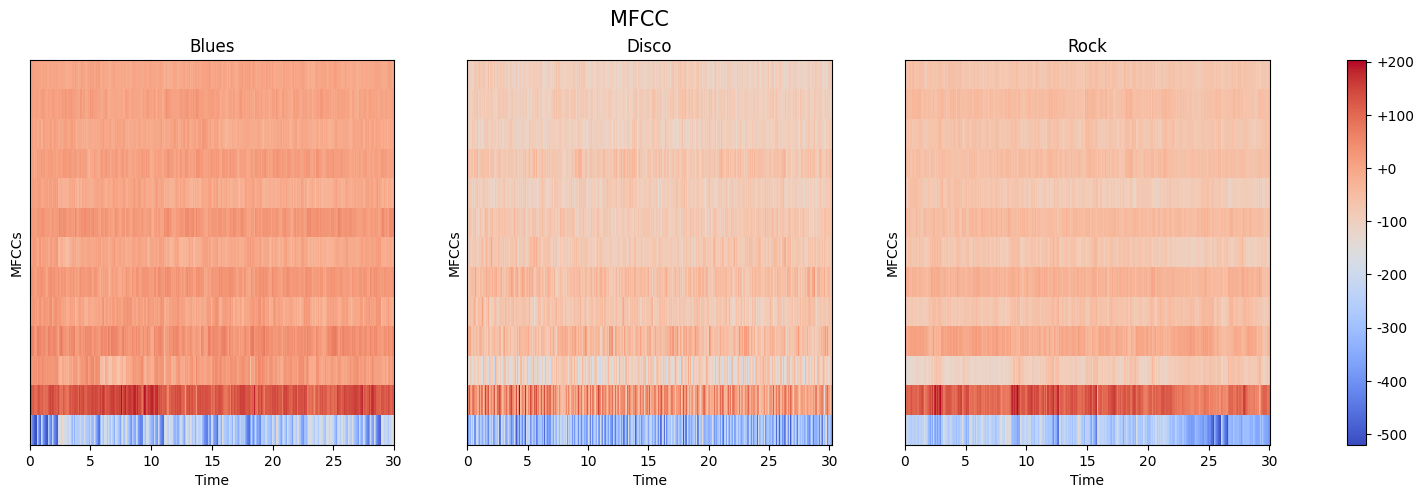

In [247]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
img_1 = librosa.display.specshow(mfccs_blues,
                                 n_fft=frame_length,
                                 hop_length=hop_length,
                                 sr = sr, 
                                 x_axis = 'time',
                                 ax = ax[0])
img_2 = librosa.display.specshow(mfccs_disco,
                                 n_fft=frame_length,
                                 hop_length=hop_length,
                                 sr = sr, 
                                 x_axis = 'time',
                                 ax = ax[1])
img_3 = librosa.display.specshow(mfccs_rock,
                                 n_fft=frame_length,
                                 hop_length=hop_length,
                                 sr = sr, 
                                 x_axis = 'time',
                                 ax = ax[2]),
for i in range(3):
    ax[i].set_title(labels[i])
    ax[i].set_ylabel('MFCCs')
fig.suptitle('MFCC', fontsize = 15, x = 0.43)
fig.colorbar(img_1, ax=ax, format="%+2.0f")

### Delta MFCCs and Delta Delta MFCCs

- Delta MFCCs are the first-order differential of MFCCs and Delta Delta MFCCs are the second-order differential of MFCCs.
- They help us understand the dynamics of power spectrum over time

In [246]:
delta_mfccs_blues = librosa.feature.delta(mfccs_blues)
delta_mfccs_disco = librosa.feature.delta(mfccs_disco)
delta_mfccs_rock = librosa.feature.delta(mfccs_rock)

delta2_mfccs_blues = librosa.feature.delta(mfccs_blues, order = 2)
delta2_mfccs_disco = librosa.feature.delta(mfccs_disco, order = 2)
delta2_mfccs_rock = librosa.feature.delta(mfccs_rock, order = 2)

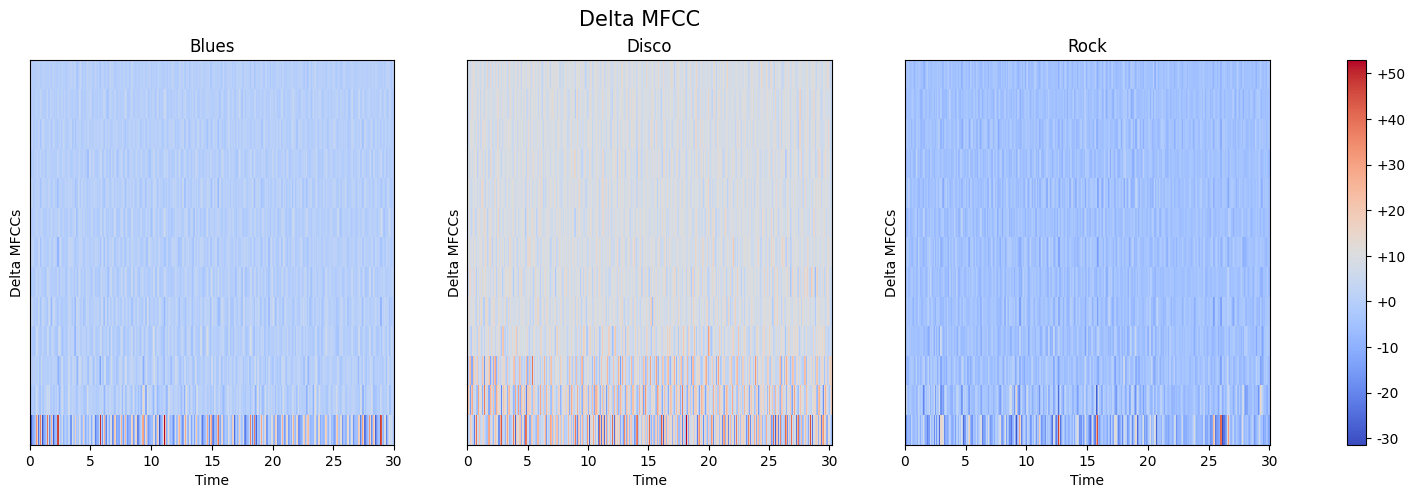

In [248]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
img_1 = librosa.display.specshow(delta_mfccs_blues,
                                 n_fft=frame_length,
                                 hop_length=hop_length,
                                 sr = sr, 
                                 x_axis = 'time',
                                 ax = ax[0])
img_2 = librosa.display.specshow(delta_mfccs_disco,
                                 n_fft=frame_length,
                                 hop_length=hop_length,
                                 sr = sr, 
                                 x_axis = 'time',
                                 ax = ax[1])
img_3 = librosa.display.specshow(delta_mfccs_rock,
                                 n_fft=frame_length,
                                 hop_length=hop_length,
                                 sr = sr, 
                                 x_axis = 'time',
                                 ax = ax[2]),
for i in range(3):
    ax[i].set_title(labels[i])
    ax[i].set_ylabel('Delta MFCCs')
fig.suptitle('Delta MFCC', fontsize = 15, x = 0.43)
fig.colorbar(img_1, ax=ax, format="%+2.0f")

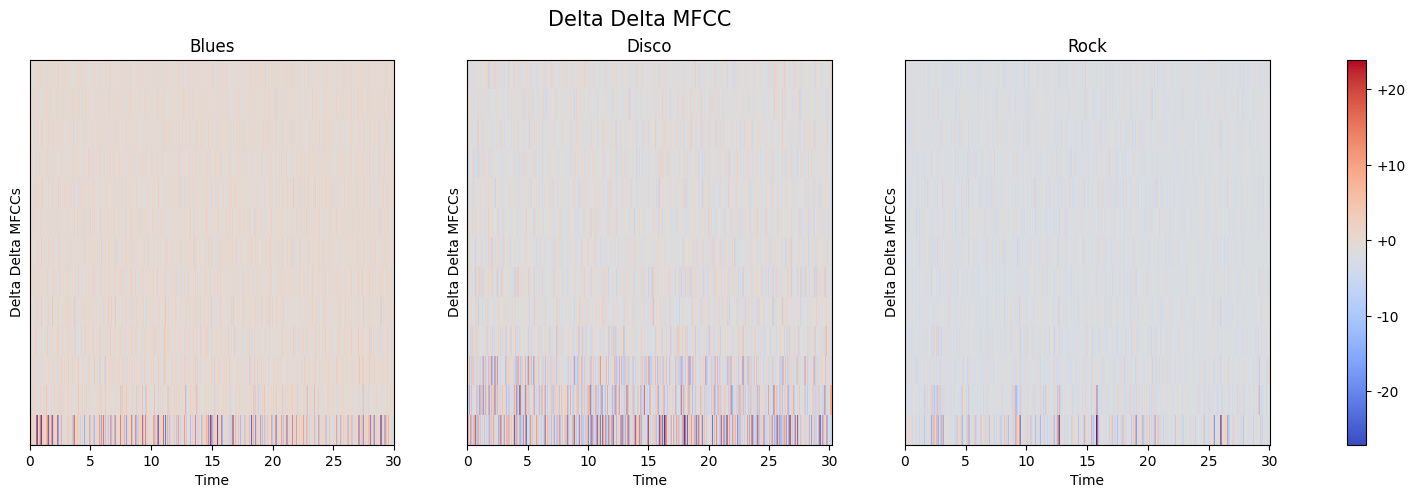

In [249]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
img_1 = librosa.display.specshow(delta2_mfccs_blues,
                                 n_fft=frame_length,
                                 hop_length=hop_length,
                                 sr = sr, 
                                 x_axis = 'time',
                                 ax = ax[0])
img_2 = librosa.display.specshow(delta2_mfccs_disco,
                                 n_fft=frame_length,
                                 hop_length=hop_length,
                                 sr = sr, 
                                 x_axis = 'time',
                                 ax = ax[1])
img_3 = librosa.display.specshow(delta2_mfccs_rock,
                                 n_fft=frame_length,
                                 hop_length=hop_length,
                                 sr = sr, 
                                 x_axis = 'time',
                                 ax = ax[2]),
for i in range(3):
    ax[i].set_title(labels[i])
    ax[i].set_ylabel('Delta Delta MFCCs')
fig.suptitle('Delta Delta MFCC', fontsize = 15, x = 0.43)
fig.colorbar(img_1, ax=ax, format="%+2.0f")